In [ ]:
!pip install python-chess

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 46.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for chess: filename=chess-1.11.2-py3-none-any.whl size=147776 sha256=af0b62f4dcacae11523acf2b8516aca616655e344b32a05a9ffe5411c370fbbb
  Stored in directory: /root/.cache/pip/wheels/fb/5d/5c/59a62d8a695285e59ec9c1f66add6f8a9ac4152499a2be0113
Successfully built chess


In [ ]:
import pandas as pd
import numpy as np
import chess
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MultiLabelBinarizer
np.complex_ = np.complex128
np.float_ = np.float64
np.string_ = np.bytes_
np.unicode_ = np.str_
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/lichess_db_puzzle.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1942,75,95,7530,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,NaN
1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1405,74,96,30875,advantage endgame short,https://lichess.org/F8M8OS71#53,NaN
2,0008Q,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6,1257,78,90,688,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#127,NaN
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1080,74,87,586,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...
4,000VW,r4r2/1p3pkp/p5p1/3R1N1Q/3P4/8/P1q2P2/3R2K1 b -...,g6f5 d5c5 c2e4 h5g5 g7h8 g5f6,2844,104,85,246,crushing endgame long,https://lichess.org/e9AY2m5j/black#50,NaN


In [ ]:
def parse_themes(theme_string):
    if isinstance(theme_string, str):
        return theme_string.split()

df['ParsedThemes'] = df['Themes'].apply(parse_themes)

df.head(10)

,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags,ParsedThemes
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1942,75,95,7530,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,NaN,"[crushing, hangingPiece, long, middlegame]"
1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1405,74,96,30875,advantage endgame short,https://lichess.org/F8M8OS71#53,NaN,"[advantage, endgame, short]"
2,0008Q,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6,1257,78,90,688,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#127,NaN,"[advantage, endgame, rookEndgame, short]"
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1080,74,87,586,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...,"[advantage, middlegame, short]"
4,000VW,r4r2/1p3pkp/p5p1/3R1N1Q/3P4/8/P1q2P2/3R2K1 b -...,g6f5 d5c5 c2e4 h5g5 g7h8 g5f6,2844,104,85,246,crushing endgame long,https://lichess.org/e9AY2m5j/black#50,NaN,"[crushing, endgame, long]"
5,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1575,80,75,102,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#105,NaN,"[crushing, endgame, long, pawnEndgame]"
6,000Zo,4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...,e5f6 e8e1 g1f2 e1f1,1353,75,86,627,endgame mate mateIn2 short,https://lichess.org/n8Ff742v#69,NaN,"[endgame, mate, mateIn2, short]"
7,000aY,r4rk1/pp3ppp/2n1b3/q1pp2B1/8/P1Q2NP1/1PP1PP1P/...,g5e7 a5c3 b2c3 c6e7,1440,79,74,512,advantage master middlegame short,https://lichess.org/iihZGl6t#29,Benoni_Defense Benoni_Defense_Benoni-Indian_De...,"[advantage, master, middlegame, short]"
8,000hf,r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3...,e8f7 e2e6 f7f8 e6f7,1483,76,91,566,mate mateIn2 middlegame short,https://lichess.org/71ygsFeE/black#38,Horwitz_Defense Horwitz_Defense_Other_variations,"[mate, mateIn2, middlegame, short]"
9,000lC,3r3r/pQNk1ppp/1qnb1n2/1B6/8/8/PPP3PP/3R1R1K w ...,d1d6 d7d6 b7b6 a7b6,1408,76,94,3489,advantage hangingPiece middlegame short,https://lichess.org/vaqz2bx6#37,NaN,"[advantage, hangingPiece, middlegame, short]"


In [ ]:

from collections import Counter

all_labels = [label for labels in df["ParsedThemes"] for label in labels]
label_counter = Counter(all_labels)

label_counter

Counter({'crushing': 1935186,
         'hangingPiece': 197090,
         'long': 1198539,
         'middlegame': 2243593,
         'advantage': 1444247,
         'endgame': 2294763,
         'short': 2542764,
         'rookEndgame': 238060,
         'pawnEndgame': 154339,
         'mate': 1326242,
         'mateIn2': 581354,
         'master': 665816,
         'exposedKing': 134930,
         'skewer': 105612,
         'fork': 654030,
         'trappedPiece': 62260,
         'pin': 296286,
         'veryLong': 380967,
         'backRankMate': 152242,
         'discoveredAttack': 256331,
         'sacrifice': 342756,
         'quietMove': 191324,
         'bishopEndgame': 60341,
         'mateIn1': 578940,
         'oneMove': 625704,
         'bodenMate': 2376,
         'deflection': 203176,
         'kingsideAttack': 391533,
         'smotheredMate': 15909,
         'advancedPawn': 277093,
         'attraction': 166049,
         'promotion': 106151,
         'mateIn3': 141136,
         '

In [ ]:
import random
import ast


allowed_set = {"mate", "fork", "pin", "sacrifice", "skewer", "advancedPawn", "exposedKing", "rookEndgame", "pawnEndgame", "hangingPiece", "discoveredAttack"}

def select_core_label(themes):
    """
    For a list of themes, convert any mate variants to 'mate',
    then keep only those in allowed_set.
    If multiple remain, choose one at random.
    Returns None if no allowed label is found.
    """
    selected = []
    for label in themes:
        # Merge any label containing 'mate' (case-insensitive) into "mate"
        if "mate" in label.lower():
            selected.append("mate")
        elif label in allowed_set:
            selected.append(label)
    # Remove duplicates
    selected = list(set(selected))
    return list(set(selected))

import ast
if df["ParsedThemes"].apply(lambda x: isinstance(x, str)).any():
    df["ParsedThemes"] = df["ParsedThemes"].apply(ast.literal_eval)

df["CoreLabel"] = df["ParsedThemes"].apply(select_core_label)

core_tactics_df = df[df["CoreLabel"].apply(lambda x: len(x) > 0)].copy()
core_tactics_df.reset_index(drop=True, inplace=True)

print(core_tactics_df[["ParsedThemes", "CoreLabel"]].head(10))
len(core_tactics_df)


                                     ParsedThemes              CoreLabel
0      [crushing, hangingPiece, long, middlegame]         [hangingPiece]
1        [advantage, endgame, rookEndgame, short]          [rookEndgame]
2          [crushing, endgame, long, pawnEndgame]          [pawnEndgame]
3                 [endgame, mate, mateIn2, short]                 [mate]
4              [mate, mateIn2, middlegame, short]                 [mate]
5    [advantage, hangingPiece, middlegame, short]         [hangingPiece]
6  [crushing, endgame, exposedKing, long, skewer]  [skewer, exposedKing]
7        [crushing, endgame, fork, master, short]                 [fork]
8             [advantage, fork, long, middlegame]                 [fork]
9                [advantage, endgame, pin, short]                  [pin]


3188480

In [ ]:
from tqdm import tqdm

sample = core_tactics_df.head(1000000).copy()

# Extract first move from the Moves column
sample["FirstMove"] = sample["Moves"].str.split().str[0]

# Apply the first move to each FEN
updated_fens = []
for fen, move in tqdm(zip(sample["FEN"], sample["FirstMove"]), total=len(sample)):
    try:
        board = chess.Board(fen)
        board.push_uci(move)
        updated_fens.append(board.fen())
    except:
        updated_fens.append(None)

sample["FEN_after_first_move"] = updated_fens

# Drop failed rows
sample = sample.dropna(subset=["FEN_after_first_move"]).reset_index(drop=True)

print(len(sample))


from collections import Counter
from itertools import chain

all_labels = list(chain.from_iterable(sample["CoreLabel"]))
label_counts = Counter(all_labels)

label_counts_df = pd.DataFrame(label_counts.items(), columns=["Label", "Count"]).sort_values(by="Count", ascending=False)
display(label_counts_df)

100%|██████████| 1000000/1000000 [01:56<00:00, 8608.48it/s]


1000000


,Label,Count
3,mate,416540
6,fork,204822
8,sacrifice,107544
7,pin,92874
10,advancedPawn,86627
9,discoveredAttack,80289
1,rookEndgame,74796
0,hangingPiece,61892
2,pawnEndgame,47991
5,exposedKing,42069


In [ ]:
piece_to_channel = {
    'P': 0, 'N': 1, 'B': 2, 'R': 3, 'Q': 4, 'K': 5,
    'p': 6, 'n': 7, 'b': 8, 'r': 9, 'q': 10, 'k': 11
}

In [ ]:
def fen_to_board_array(fen):
    """
    Converts a FEN string into an 8x8x19 numpy array.
    Channels:
      0-11: Basic one-hot encoding for pieces.
      12: Attacked by White (1 if square is attacked by at least one white piece).
      13: Attacked by Black.
      14: White kingside castling rights (entire plane: 1 if available, else 0).
      15: White queenside castling rights.
      16: Black kingside castling rights.
      17: Black queenside castling rights.
      18: Side-to-move (entire plane: 1 if White, 0 if Black).
    """
    board = chess.Board(fen)
    board_array = np.zeros((8, 8, 19), dtype=np.float32)
    # --- 8x8x12 one-hot encoding for pieces ---
    for square, piece in board.piece_map().items():
        row = square // 8
        col = square % 8
        channel = piece_to_channel[piece.symbol()]
        board_array[row, col, channel] = 1.0
    # --- Attacked squares channels ---
    # Channel 12: attacked by white; Channel 13: attacked by black.
    for square in chess.SQUARES:
        row = square // 8
        col = square % 8
        if board.is_attacked_by(chess.WHITE, square):
            board_array[row, col, 12] = 1.0
        if board.is_attacked_by(chess.BLACK, square):
            board_array[row, col, 13] = 1.0

    # --- Castling rights channels ---
    # Channels 14-17: constant planes for castling rights.
    castling_channels = [14, 15, 16, 17]
    # White kingside
    flag = 1.0 if board.has_kingside_castling_rights(chess.WHITE) else 0.0
    board_array[:, :, 14] = flag
    # White queenside
    flag = 1.0 if board.has_queenside_castling_rights(chess.WHITE) else 0.0
    board_array[:, :, 15] = flag
    # Black kingside
    flag = 1.0 if board.has_kingside_castling_rights(chess.BLACK) else 0.0
    board_array[:, :, 16] = flag
    # Black queenside
    flag = 1.0 if board.has_queenside_castling_rights(chess.BLACK) else 0.0
    board_array[:, :, 17] = flag

    # --- Side-to-move channel ---
    # Channel 18: fill the plane with 1 if White's turn, else 0.
    side = 1.0 if board.turn == chess.WHITE else 0.0
    board_array[:, :, 18] = side

    return board_array

example_fen = sample["FEN_after_first_move"].iloc[0]
refined_board = fen_to_board_array(example_fen)
print("Example FEN:", example_fen)
print("Refined board array shape:", refined_board.shape)

Example FEN: r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2b1/PqP3PP/7K w - - 0 25
Refined board array shape: (8, 8, 19)


In [ ]:
X_list = []
for fen in tqdm(sample["FEN_after_first_move"], desc="Converting FENs to board arrays"):
    board_array = fen_to_board_array(fen)
    X_list.append(board_array)
X = np.array(X_list)
print("X shape:", X.shape)

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(sample["CoreLabel"])
print("y shape:", y.shape)
print("Label space (all parsed themes):", mlb.classes_)

Converting FENs to board arrays: 100%|██████████| 1000000/1000000 [04:29<00:00, 3708.28it/s]


X shape: (1000000, 8, 8, 19)
y shape: (1000000, 11)
Label space (all parsed themes): ['advancedPawn' 'discoveredAttack' 'exposedKing' 'fork' 'hangingPiece'
 'mate' 'pawnEndgame' 'pin' 'rookEndgame' 'sacrifice' 'skewer']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Dropout, Add, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

def residual_block(x, filters, stride=1, dropout_rate=0.3):
    shortcut = x

    # First convolution
    x = Conv2D(filters, (3, 3), strides=stride, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Dropout(dropout_rate)(x)

    # Second convolution
    x = Conv2D(filters, (3, 3), padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)

    # Adjust shortcut if needed
    if stride != 1 or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, (1, 1), strides=stride, padding='same', use_bias=False)(shortcut)
        shortcut = BatchNormalization()(shortcut)

    # Merge
    x = Add()([x, shortcut])
    x = ReLU()(x)
    x = Dropout(dropout_rate)(x)

    return x

def build_resnet_x(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    x = Conv2D(64, (3, 3), padding='same', use_bias=False)(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Stage 1: 64 filters (no downsample)
    for _ in range(4):
        x = residual_block(x, 64)

    # Stage 2: 128 filters (downsample)
    x = residual_block(x, 128, stride=2)
    for _ in range(3):
        x = residual_block(x, 128)

    # Stage 3: 256 filters (downsample)
    x = residual_block(x, 256, stride=2)
    x = residual_block(x, 256)

    # Global average pooling and final output
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='sigmoid')(x)

    return Model(inputs, outputs)

# Usage
model = build_resnet_x((8, 8, 19), num_classes=len(mlb.classes_))
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 8, 8, 19)       │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 8, 8, 64)       │         10,944 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 8, 8, 64)       │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 8, 8, 64)       │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 8, 8, 64)       │         36,864 │ re_lu[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 8, 8, 64)       │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_1 (ReLU)            │ (None, 8, 8, 64)       │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 8, 8, 64)       │              0 │ re_lu_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 8, 8, 64)       │         36,864 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 8, 8, 64)       │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 8, 8, 64)       │              0 │ batch_normalization_2… │
│                           │                        │                │ re_lu[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_2 (ReLU)            │ (None, 8, 8, 64)       │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 8, 8, 64)       │              0 │ re_lu_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 8, 8, 64)       │         36,864 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 8, 8, 64)       │            256 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_3 (ReLU)            │ (None, 8, 8, 64)       │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 8, 8, 64)       │              0 │ re_lu_3[0][0]          │
├──────────────────────

 Total params: 3,531,979 (13.47 MB)

 Trainable params: 3,525,963 (13.45 MB)

 Non-trainable params: 6,016 (23.50 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=128,
    callbacks=[early_stop]
)

Epoch 1/100
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 95s 10ms/step - accuracy: 0.4610 - loss: 0.2605 - val_accuracy: 0.5654 - val_loss: 0.2078
Epoch 2/100
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 55s 9ms/step - accuracy: 0.5692 - loss: 0.2038 - val_accuracy: 0.5948 - val_loss: 0.1884
Epoch 3/100
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 57s 9ms/step - accuracy: 0.5924 - loss: 0.1888 - val_accuracy: 0.6256 - val_loss: 0.1705
Epoch 4/100
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 56s 9ms/step - accuracy: 0.6160 - loss: 0.1759 - val_accuracy: 0.6300 - val_loss: 0.1651
Epoch 5/100
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 56s 9ms/step - accuracy: 0.6269 - loss: 0.1694 - val_accuracy: 0.6444 - val_loss: 0.1601
Epoch 6/100
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 56s 9ms/step - accuracy: 0.6361 - loss: 0.1656 - val_accuracy: 0.6568 - val_loss: 0.1547
Epoch 7/100
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 55s 9ms/step - accuracy: 0.6405 - loss: 0.1630 - val_accuracy: 0.6588 - val_loss: 0.1520
Epoch 8/100
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 54s 9ms/step - accuracy: 0.6439 

In [ ]:
def top_k_accuracy_score_multilabel(y_true, y_pred, k):
    num_samples = y_true.shape[0]
    hits = 0

    for i in range(num_samples):
        # Get indices of top-k predicted classes
        topk_indices = np.argsort(y_pred[i])[::-1][:k]

        # Check if any top-k index is a true label (y_true[i] == 1)
        # If y_true[i, topk_idx] == 1 for any of them, it's a 'hit'
        if np.any(y_true[i, topk_indices] == 1):
            hits += 1

    return hits / num_samples

In [ ]:
from sklearn.metrics import f1_score, hamming_loss, classification_report, precision_score, recall_score


y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.35).astype(int)

f1 = f1_score(y_test, y_pred_binary, average='micro')
h_loss = hamming_loss(y_test, y_pred_binary)

print("F1 Score (micro):", f1)
print("Hamming Loss:", h_loss)


top3_acc = top_k_accuracy_score_multilabel(y_test, y_pred, k=3)
print(f"Top-3 Accuracy: {top3_acc:.4f}")



print(classification_report(y_test, y_pred_binary, target_names=mlb.classes_))

true_labels = mlb.inverse_transform(y_test)
pred_labels = mlb.inverse_transform(y_pred_binary)
print("\Predictions:")
for i in range(10):
    print(f"Sample #{i+1}")
    print("  True Labels:     ", true_labels[i])
    print("  Predicted Labels:", pred_labels[i])
    print()

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step
F1 Score (micro): 0.7663082004188819
Hamming Loss: 0.05274636363636363
Top-3 Accuracy: 0.9536
                  precision    recall  f1-score   support

    advancedPawn       0.73      0.79      0.76     17344
discoveredAttack       0.69      0.48      0.57     15955
     exposedKing       0.45      0.58      0.51      8292
            fork       0.75      0.69      0.72     41166
    hangingPiece       0.68      0.91      0.78     12429
            mate       0.83      0.95      0.88     83138
     pawnEndgame       1.00      1.00      1.00      9603
             pin       0.70      0.41      0.51     18726
     rookEndgame       0.99      1.00      1.00     15076
       sacrifice       0.62      0.47      0.54     21296
          skewer       0.63      0.51      0.56      6639

       micro avg       0.77      0.76      0.77    249664
       macro avg       0.73      0.71      0.71    249664
    weighted avg       0.76      0.76      0.76 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


\Predictions:
Sample #1
  True Labels:      ('mate',)
  Predicted Labels: ('mate',)

Sample #2
  True Labels:      ('fork',)
  Predicted Labels: ('fork',)

Sample #3
  True Labels:      ('mate',)
  Predicted Labels: ('mate',)

Sample #4
  True Labels:      ('hangingPiece', 'mate')
  Predicted Labels: ('hangingPiece', 'mate')

Sample #5
  True Labels:      ('fork',)
  Predicted Labels: ('fork',)

Sample #6
  True Labels:      ('discoveredAttack', 'mate')
  Predicted Labels: ('exposedKing', 'mate')

Sample #7
  True Labels:      ('skewer',)
  Predicted Labels: ('skewer',)

Sample #8
  True Labels:      ('mate',)
  Predicted Labels: ('mate',)

Sample #9
  True Labels:      ('hangingPiece',)
  Predicted Labels: ('hangingPiece',)

Sample #10
  True Labels:      ('mate',)
  Predicted Labels: ('mate',)



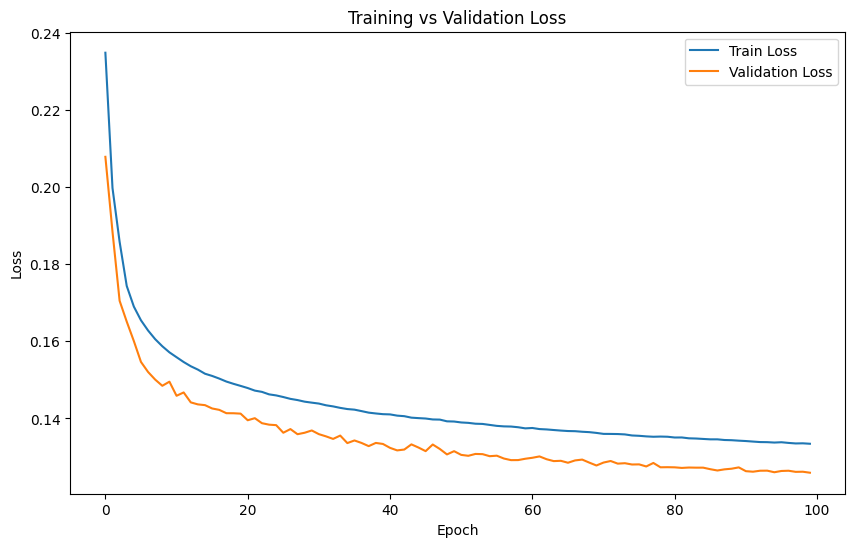

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.savefig("resnetx.png", dpi=300, bbox_inches="tight")
plt.savefig("resnetx.pdf", format='pdf', dpi=300)
plt.show()


In [ ]:
model.save('/content/drive/MyDrive/resnetx.h5')
